In [145]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

### 과제 1: Iris 3-class 분류  
LogisticRegression으로 3개 붓꽃 종류 모두 분류하기  

In [2]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [11]:
y_pred = model.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

Accuracy:  0.967
Precision: 0.972
Recall:    0.963
F1-Score:  0.966


---
### 과제 2: 타이타닉 데이터의 alive로 생존자 분류

In [638]:
df = sns.load_dataset('titanic')

In [639]:
df_t = df.copy()
df_t['age'] = df_t['age'].fillna(df_t.groupby(['sex', 'class'])['age'].transform('median'))
df_t['embarked'] = df_t['embarked'].fillna('S')
df_t['embark_town'] = df_t['embark_town'].fillna('Southampton')

/var/folders/hq/nv6vbr1s14g02bjpd___x4_80000gn/T/ipykernel_60914/1785145891.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_t['age'] = df_t['age'].fillna(df_t.groupby(['sex', 'class'])['age'].transform('median'))


In [640]:
df_t['sex'] = df_t['sex'].map({'male':0, 'female':1})
df_t = pd.get_dummies(df_t, columns=['embarked'])
df_t['age'] = df_t['age'].astype(int)

In [641]:
X = df_t.drop(['survived', 'alive', 'class', 'who', 'embark_town', 'adult_male', 'deck'], axis=1)
y = df_t['survived']

In [642]:
X

,pclass,sex,age,sibsp,parch,fare,alone,embarked_C,embarked_Q,embarked_S
0,3,0,22,1,0,7.2500,False,False,False,True
1,1,1,38,1,0,71.2833,False,True,False,False
2,3,1,26,0,0,7.9250,True,False,False,True
3,1,1,35,1,0,53.1000,False,False,False,True
4,3,0,35,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,True,False,False,True
887,1,1,19,0,0,30.0000,True,False,False,True
888,3,1,21,1,2,23.4500,False,False,False,True
889,1,0,26,0,0,30.0000,True,True,False,False


In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [644]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [645]:
y_pred = model.predict(X_test)

In [646]:
y_proba = model.predict_proba(X_test)[:,1]

In [647]:
confusion_matrix(y_test, y_pred)

array([[91, 14],
       [20, 54]])

In [648]:
print(classification_report(y_test, y_pred, target_names=['survived_no', 'survived_yes']))

              precision    recall  f1-score   support

 survived_no       0.82      0.87      0.84       105
survived_yes       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [649]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print(f"AUC: {auc_score:.3f}")

AUC: 0.888


In [650]:
for thresh in [0.3, 0.5, 0.7, 0.9]:
    y_pred_t = (y_proba >= thresh).astype(int)
    prec = precision_score(y_test, y_pred_t)
    rec = recall_score(y_test, y_pred_t)
    print(f"Threshold {thresh:.1f} : Precision = {prec:.3f}, Recall = {rec:.3f}")

Threshold 0.3 : Precision = 0.699, Recall = 0.878
Threshold 0.5 : Precision = 0.794, Recall = 0.730
Threshold 0.7 : Precision = 0.891, Recall = 0.554
Threshold 0.9 : Precision = 1.000, Recall = 0.257


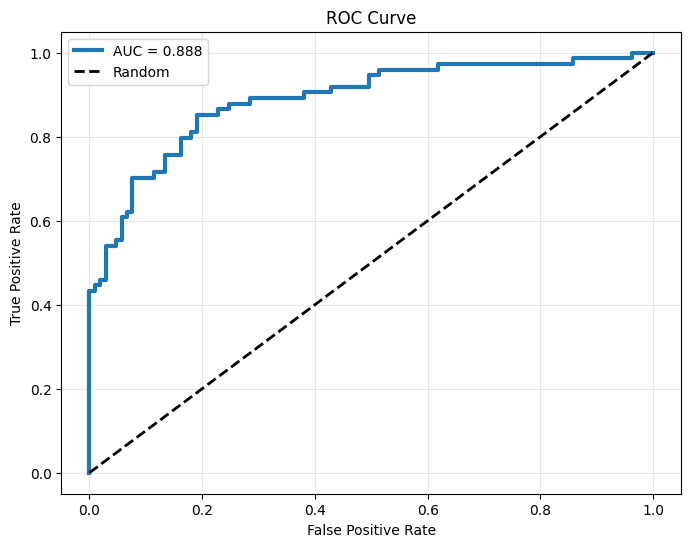

In [651]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=3, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()